# Tensorflow 1 Tutorial
I basically followed https://github.com/Kulbear 's work on Andrew Ng's Deep Learning Specialization C2W3 homework assignment with some modification

## 1 Importing the Libraries and Setting up Enviornments

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import math

import h5py
import sys
from google.colab import drive

from tensorflow.python.framework import ops #including tf.Graph, tf.Tensor

%matplotlib inline
np.random.seed(1)

# import custom modules
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Specialization/02 Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization/C2W3')

In [4]:
# importing custom modules
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

In [5]:
# implementing loss fuction
y_hat = tf.constant(36, name='y_hat')
y = tf.constant(39, name='y')

loss = tf.Variable( (y_hat - y)**2 , name='loss')

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))


9


In [6]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a, b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [7]:
session = tf.Session()
session.run(c)

20

In [8]:
x = tf.placeholder(tf.int64, name='x')
print(session.run( 2 * x, feed_dict={ x : 3 }))
session.close()

6


## 1.1 Linear Function


In [9]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    np.random.seed(1)
    
    X = tf.constant( np.random.randn(3 , 1), name='X')
    W = tf.constant( np.random.randn(4 , 3), name='W')
    b = tf.constant( np.random.randn(4 ,1), name='b')
    y = tf.Variable( tf.matmul(W, X) + b, name='y' )

    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)
        print(session.run(y))

In [10]:
print( "result = " + str(linear_function()))

[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
result = None


## 1.2 Computing the sigmoid

In [11]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    x = tf.placeholder(tf.float32, name='x')
    activation = tf.sigmoid(x)

    with tf.Session() as session:
        return session.run(activation, feed_dict={x:z})

In [12]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))


sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


### 1.3 Computing the Cost

In [13]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """

    z = tf.placeholder(tf.float32, name='z')
    y = tf.placeholder(tf.float32, name='y')

    cost = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z)

    with tf.Session() as session:
        cost = session.run(cost, feed_dict={z:logits, y:labels})
    
    return cost


In [14]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
cost = [1.0053872  1.0366409  0.41385433 0.39956614]


### 1.4 Using One Hot Encoding

In [15]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    C = tf.constant(C, name='C')

    one_hot_matrix = tf.one_hot( indices=labels, depth=C, axis=0 )
    with tf.Session() as session:
        one_hot = session.run(one_hot_matrix)
    
    return one_hot   


In [16]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C=4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### 1.5  Initialize with Zeros and Ones

In [17]:

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    ones = tf.ones(shape=shape, name='ones')

    with tf.Session() as session:
        ones = session.run(ones )
    return ones

In [18]:
print ("ones = " + str(ones([3])))


ones = [1. 1. 1.]


## 2 Building your First Neural Network in Tensorflow

In [28]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()                                             

In [29]:
X_train_orig.shape, Y_train_orig.shape

((1080, 64, 64, 3), (1, 1080))

y=5


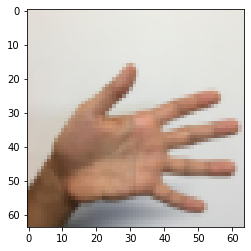

In [30]:
index = 0
plt.imshow(X_train_orig[index])
print('y='+str(np.squeeze(Y_train_orig[:, index])))

In [35]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten  =  X_test_orig.reshape(X_test_orig.shape[0] ,-1).T

X_train = X_train_flatten / 255.
X_test  = X_test_flatten / 255.

Y_train =  convert_to_one_hot(Y_train_orig, 6)
Y_test =  convert_to_one_hot(Y_test_orig, 6)

In [36]:
print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))


number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


### 2.1 Create Placeholder

In [38]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    X = tf.placeholder(tf.float32, shape=(n_x,None ),  name='X')
    Y = tf.placeholder(tf.float32, shape=(n_y, None ), name='Y')

    return X, Y


In [39]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_5:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_3:0", shape=(6, ?), dtype=float32)


### 2.2 Initializing the parameters

In [41]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """

    tf.set_random_seed(1)

    W1 = tf.get_variable(name='W1', shape=(25,12288), initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable(name='b1', shape=(25, 1), initializer=tf.zeros_initializer())

    W2 = tf.get_variable(name='W2', shape=(12,25), initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable(name='b2', shape=(12, 1), initializer=tf.zeros_initializer()) 

    W3 = tf.get_variable(name='W3', shape=(6,12), initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable(name='b3', shape=(6, 1), initializer=tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [42]:
tf.reset_default_graph()

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


### 2.3 Forward Propagation in tensorflow

In [43]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.matmul(W1, X) + b1
    A1 = tf.nn.relu(Z1)

    Z2 = tf.matmul(W2, A1) + b2
    A2 = tf.nn.relu(Z2)

    Z3 = tf.matmul(W3, A2) + b3
    #A3 = tf.nn.softmax(Z3)

    return Z3

In [44]:
tf.reset_default_graph()

with tf.Session() as session:
  X, Y = create_placeholders(12288, 6)
  parameters = initialize_parameters()
  Z3 = forward_propagation(X, parameters)
  print("Z3 = " + str(Z3))


Z3 = Tensor("add_2:0", shape=(6, ?), dtype=float32)


### 2.4 Compute Cost


In [60]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost


In [61]:
tf.reset_default_graph()

with tf.Session() as sess:
  X, Y = create_placeholders(12288, 6)
  parameters = initialize_parameters()
  Z3 = forward_propagation(X, parameters)
  cost = compute_cost(Z3, Y)
  print("cost = " + str(cost))


cost = Tensor("Mean:0", shape=(), dtype=float32)


### 2.5 Backward Propagation and Parameter Updates and Build the Model

In [62]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []

    X, Y = create_placeholders(n_x, n_y)

    parameters = initialize_parameters()

    Z3 = forward_propagation(X, parameters)

    cost = compute_cost(Z3, Y)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int (m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            for minibatch in minibatches:
              (minibatch_X, minibatch_Y) = minibatch
              _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
              epoch_cost += minibatch_cost / num_minibatches
                  
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.855583
Cost after epoch 100: 1.646989
Cost after epoch 200: 1.527060
Cost after epoch 300: 1.437360
Cost after epoch 400: 1.355498
Cost after epoch 500: 1.280590
Cost after epoch 600: 1.213103
Cost after epoch 700: 1.152333
Cost after epoch 800: 1.094462
Cost after epoch 900: 1.044278
Cost after epoch 1000: 0.992671
Cost after epoch 1100: 0.942370
Cost after epoch 1200: 0.899435
Cost after epoch 1300: 0.855888
Cost after epoch 1400: 0.812786


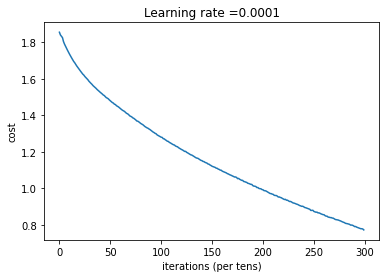

Parameters have been trained!
Train Accuracy: 0.7888889
Test Accuracy: 0.69166666


In [63]:
parameters = model(X_train, Y_train, X_test, Y_test)
